Superstore Sales Data Analysis

Import Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

Load Data

In [4]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/superstore_sales_dataset.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Row ID')
else:
    print('file not found')

In [5]:
# Getting the overall information of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [7]:
dataset.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
dataset.describe() 

,Postal Code,Sales
count,9789.000000,9800.000000
mean,55273.322403,230.769059
std,32041.223413,626.651875
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,58103.000000,54.490000
75%,90008.000000,210.605000
max,99301.000000,22638.480000


In [12]:
dataset['Order Date'].info()

<class 'pandas.core.series.Series'>
Index: 9800 entries, 1 to 9800
Series name: Order Date
Non-Null Count  Dtype 
--------------  ----- 
9800 non-null   object
dtypes: object(1)
memory usage: 153.1+ KB


In [17]:
dataset['Order Date']

Row ID
1       08/11/2017
2       08/11/2017
3       12/06/2017
4       11/10/2016
5       11/10/2016
           ...    
9796    21/05/2017
9797    12/01/2016
9798    12/01/2016
9799    12/01/2016
9800    12/01/2016
Name: Order Date, Length: 9800, dtype: object

In [23]:
dataset['Order_Date'] = pd.to_datetime(dataset['Order Date'], format='%d/%m/%Y') #convert Order dates to pandas datetime format

<Axes: xlabel='month'>

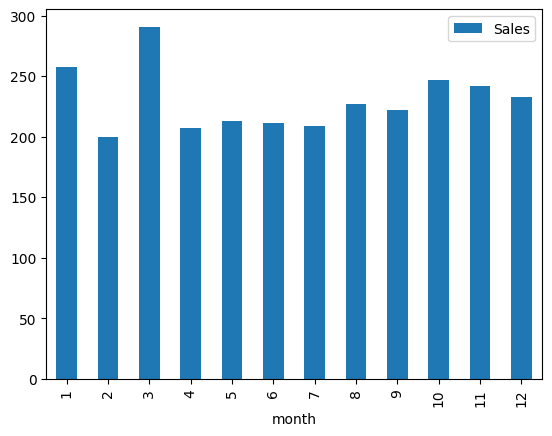

In [30]:
# Doanh thu trung bình theo tháng là bao nhiêu?
dataset['month'] = dataset['Order_Date'].dt.month
data_group_by_month = dataset.groupby(['month'])[['Sales']].mean()
data_group_by_month.plot.bar()

<Axes: xlabel='quarter'>

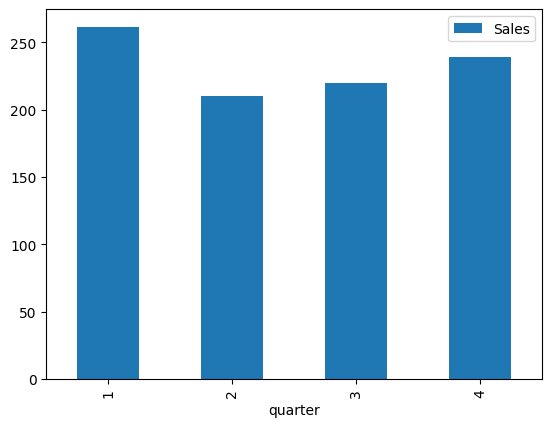

In [31]:
# Doanh thu trung bình theo quý là bao nhiêu?
dataset['quarter'] = dataset['Order_Date'].dt.quarter
data_group_by_quarter = dataset.groupby(['quarter'])[['Sales']].mean()
data_group_by_quarter.plot.bar()

In [33]:
# Sản phẩm nào có doanh thu cao nhất?
data_group_by_product = dataset.groupby(['Product Name'])[['Sales']].sum()

In [35]:
data_group_by_product.loc[data_group_by_product['Sales'] == data_group_by_product['Sales'].max()]

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824


Khu vực nào có doanh số  mạnh nhất?

In [36]:
dgb_state = dataset.groupby(['State'])[['Sales']].sum()
dgb_state.loc[dgb_state['Sales'] == dgb_state['Sales'].max()]

,Sales
State,
California,446306.4635


Khách hàng lặp lại mua hàng bao nhiêu lần?

In [39]:
dgb_customer = dataset.groupby(['Customer Name'])[['Sales']].count()
dgb_customer.sort_values(by='Sales', ascending=False).head(10)

,Sales
Customer Name,
William Brown,35
Paul Prost,34
Matt Abelman,34
John Lee,33
Seth Vernon,32
Chloris Kastensmidt,32
Jonathan Doherty,32
Arthur Prichep,31
Emily Phan,31
